 ## This project aims to predict the price of a car with two different methods, the classic machine learning method with Sklearn and the Deep neural network with TensorFlow.

**Machine learning**

Importing Libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset.

In [2]:
data = pd.read_csv('car_price.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Becoming one with the data

In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data.info()
# This table provides some information about the data, like the type of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


***Data Preprocessing***

*Missing Data*

In [5]:
# let's check Null data
data.isnull().sum()
# There are 172 missing data for Price and 150 for EngineeV.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
#creating a copy of data
data_without_null = data.copy()

In [7]:
# now we need to remove these missing data
data_without_null = data_without_null.dropna(axis=0)

In [8]:
# check the information of the data
data_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


In [9]:
# check missing data
data_without_null.isnull().sum()
# good! we do not have any missing data.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

## Studying the outliers of each feature.

In [10]:
# the method below is to study the outliers by plotting the probability distribution functions.
import seaborn as sns # seeborn has a handy function to draw the probability.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

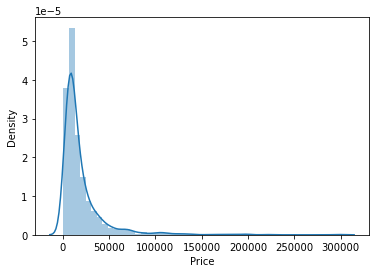

In [11]:
sns.distplot(data_without_null['Price'])
# for the car's price, the outliers are located on the right side of the plot related to the expensive cars.

In [12]:
#let's remove the one percent of the price from rght-side of the graph
q_price = data_without_null['Price'].quantile(0.99) # q_price is a variable equal to 99% of the price.
data_pre_process_1 = data_without_null[data_without_null['Price']<q_price] # I apply the above condition to the data
data_pre_process_1.describe() # the number of data decreases from 4025 to 3984

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

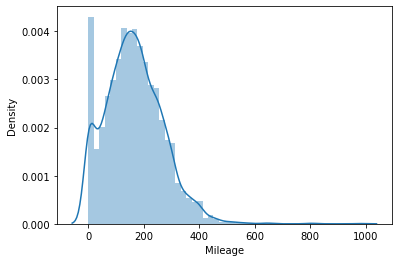

In [13]:
# plotting data for Mileage.
sns.distplot(data_pre_process_1['Mileage'])
#in this case, the data larger than 600 is almost outliers.

In [14]:
# the same method for Mileage.
q_mileage = data_pre_process_1['Mileage'].quantile(0.998) # q_mileage is a variable equal to 99.8% of the milage.
data_pre_process_2 = data_pre_process_1[data_pre_process_1['Mileage']<q_mileage] # I apply the above condition to the data
data_pre_process_2.describe() # we have just lost 8 data points in this case.

,Price,Mileage,EngineV,Year
count,3976.000000,3976.000000,3976.000000,3976.00000
mean,17827.760553,164.021378,2.743984,2006.29326
std,18969.098290,99.747787,4.960888,6.67514
min,600.000000,0.000000,0.600000,1969.00000
25%,6950.000000,93.000000,1.800000,2002.75000
50%,11400.000000,160.000000,2.200000,2007.00000
75%,21000.000000,230.000000,3.000000,2011.00000
max,129222.000000,550.000000,99.990000,2016.00000


/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:xlabel='EngineV', ylabel='Density'>,)

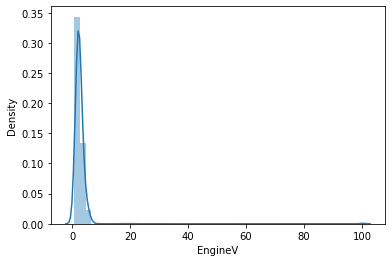

In [15]:
# let's check for EngineV
sns.distplot(data_pre_process_2['EngineV']), 


In [16]:
data_pre_process_3 = data_pre_process_2[data_pre_process_2['EngineV']<8.5] # by a simple search on the internet we can find that 
#the maximum engine volume is 8.5 L. then, we remove higher than this value.

/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

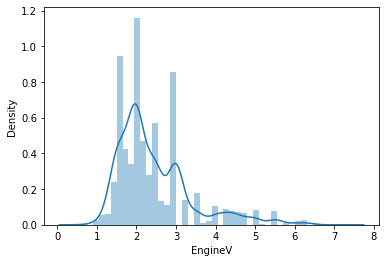

In [17]:
sns.distplot(data_pre_process_3['EngineV'])


In [18]:
data_pre_process_3.describe() # in this stage, we removed 21 data points.

,Price,Mileage,EngineV,Year
count,3955.000000,3955.000000,3955.000000,3955.000000
mean,17883.754731,163.821997,2.444539,2006.310240
std,19000.070217,99.790315,0.949575,6.674496
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,93.000000,1.800000,2003.000000
50%,11500.000000,159.000000,2.200000,2007.000000
75%,21250.000000,230.000000,3.000000,2011.000000
max,129222.000000,550.000000,7.200000,2016.000000


/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

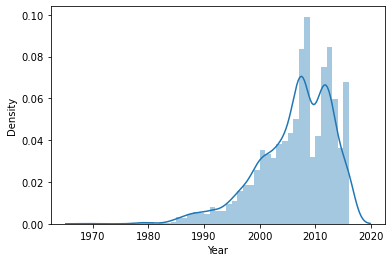

In [19]:
# now, we need to check the data for year.
sns.distplot(data_pre_process_3['Year'])
#the outliers are in the left side.

In [20]:
#we remove the data before 1980 to deal with the outliers.
data_pre_process_4 = data_pre_process_3[data_pre_process_3['Year']>1980]

In [21]:
data_pre_process_4.describe()

,Price,Mileage,EngineV,Year
count,3946.000000,3946.000000,3946.000000,3946.00000
mean,17909.842172,163.814242,2.445198,2006.37481
std,19007.451559,99.665032,0.950242,6.54168
min,800.000000,0.000000,0.600000,1982.00000
25%,6999.250000,93.000000,1.800000,2003.00000
50%,11500.000000,159.000000,2.200000,2007.00000
75%,21300.000000,230.000000,3.000000,2011.00000
max,129222.000000,550.000000,7.200000,2016.00000


/home/pouria/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

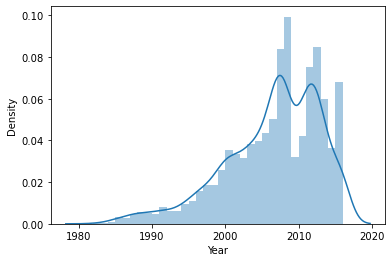

In [22]:
sns.distplot(data_pre_process_4['Year'])


In [23]:
# let's drop the column for the model of the car, as it does not play a critical role here, 
# and there are lots of models to make dummies in the following sections.
data_pre_process_4.head()
data_pre_process_4 = data_pre_process_4.drop(['Model'], axis=1)

In [65]:
data_pre_process_4.head()
data_pre_process_4.to_csv('data_prep.csv')

To solve a regression problem with statsmodel, there are five conditions that need to be satisfied. 
let's check these conditions

Text(0.5, 1.0, 'Price and Mileage')

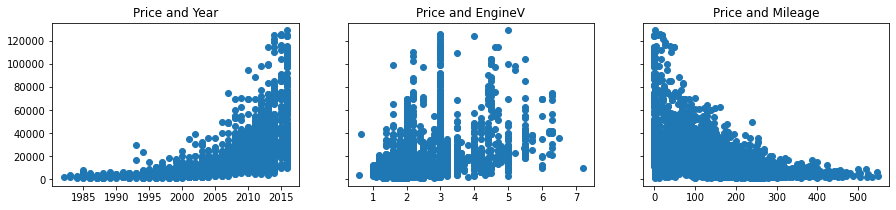

In [25]:
#let's visualize the data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_pre_process_4['Year'],data_pre_process_4['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_pre_process_4['EngineV'],data_pre_process_4['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_pre_process_4['Mileage'],data_pre_process_4['Price'])
ax3.set_title('Price and Mileage')
#as the price is the y-axis for all three features, I used subplots.
#the data should be linear for linear regression, but this is not linear here. 
#one way to deal with this is to use the log of the price.
#let's check!

**Log of Price**

In [26]:
# I employ numpy to generate log of price, and then add to the dataframe.
log_price = np.log(data_pre_process_4['Price'])
data_log = data_pre_process_4.copy()
data_log['Price_log']= log_price

In [27]:
data_log.describe()

,Price,Mileage,EngineV,Year,Price_log
count,3946.000000,3946.000000,3946.000000,3946.00000,3946.000000
mean,17909.842172,163.814242,2.445198,2006.37481,9.388547
std,19007.451559,99.665032,0.950242,6.54168,0.892498
min,800.000000,0.000000,0.600000,1982.00000,6.684612
25%,6999.250000,93.000000,1.800000,2003.00000,8.853558
50%,11500.000000,159.000000,2.200000,2007.00000,9.350102
75%,21300.000000,230.000000,3.000000,2011.00000,9.966462
max,129222.000000,550.000000,7.200000,2016.00000,11.769287


Text(0.5, 1.0, 'Price and Mileage')

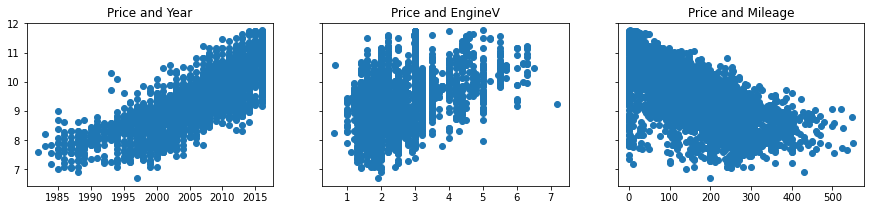

In [28]:
# now let's check if the log data works better.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_log['Year'],data_log['Price_log'])
ax1.set_title('Price and Year')
ax2.scatter(data_log['EngineV'],data_log['Price_log'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_log['Mileage'],data_log['Price_log'])
ax3.set_title('Price and Mileage')
# it looks like this plots works well, and they are linear.

In [29]:
# let's drop the price column and work with the log_price.
data_pre_process_log = data_log.copy()

In [30]:
data_pre_process_log = data_pre_process_log.drop(['Price'], axis = 1)

In [31]:
data_pre_process_log.describe()

,Mileage,EngineV,Year,Price_log
count,3946.000000,3946.000000,3946.00000,3946.000000
mean,163.814242,2.445198,2006.37481,9.388547
std,99.665032,0.950242,6.54168,0.892498
min,0.000000,0.600000,1982.00000,6.684612
25%,93.000000,1.800000,2003.00000,8.853558
50%,159.000000,2.200000,2007.00000,9.350102
75%,230.000000,3.000000,2011.00000,9.966462
max,550.000000,7.200000,2016.00000,11.769287


**Multicollinearity**

In [32]:
#let's check the Multicollinearity of the features.
# we can do it by using the variance inflation factor
#let's import this function.

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [33]:
# we check the multicollinearity for Mileage, Year, and EngineV.
input_vif = data_pre_process_log[['Mileage','Year','EngineV']]
[variance_inflation_factor(input_vif, i)  for i in range(input_vif.shape[1])]
# based on vif function, the feature with the highest value should be removed because it has the highest Multicollinearity.

[3.6747728213896065, 10.28327257722121, 7.623592506664658]

In [34]:
# let's drop year. 
data_pre_process_log = data_pre_process_log.drop(['Year'], axis = 1)

In [35]:
data_pre_process_log.head(7)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Price_log
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
6,BMW,sedan,438,2.0,Gas,yes,8.716044
7,Audi,vagon,200,2.7,Diesel,yes,9.560997


## Dummy Variables

It's time to deal with the dummy variables.

In [36]:
data_dummies = data_pre_process_log.copy()

In [37]:
# I use the get dummy function to do this.

data_dummies = pd.get_dummies(data_dummies)

In [38]:
data_dummies.head()

,Mileage,EngineV,Price_log,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [39]:
# now our data is ready to feed into a machine learning algorithm.
data_preprocessed = data_dummies.copy()

In [40]:
data_preprocessed.to_csv('data_preprocessed.csv')

## Inputs and targets

In [41]:
x = data_preprocessed.drop(['Price_log'], axis = 1)
y = data_preprocessed['Price_log']
# we defined "X" as inputs and "y" as targets.

In [42]:
# because most of data points for the inputs are close to one and zero, wee need to scale those are different.
# I use the standardscaler to scale all inputs.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 

StandardScaler()

In [43]:
# now , wee need to store them in a new variable
x_scaled = scaler.transform(x)

## Spliting the data into Train and test.

In [44]:
# I use the following function from sklearn.
from sklearn.model_selection import train_test_split

# Split the variables with an 80% for training set and 20% for test dataset.
# To have the same split as mine, use random_state = 42
# shufelling is on by default.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [45]:
# let's check the lenght of the train and test sets.
len(x_train), len(x_test), len(y_train), len(y_test)

(3156, 790, 3156, 790)

## LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
# we have imported the linear regression from sklearn.

In [47]:
#let's fit the data to LinearRegression model as the first ML method.
reg = LinearRegression()
#fit the training data to the machine learning algorihm.
#the test data should remain unseen by the machine.
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
# let's evaluate model on the training set.
reg.score(x_train, y_train)

0.730646332368492

In [49]:
#let's compare the prediction set with the true sets by visualization.
y_pred = reg.predict(x_train)
#this function applies the prediction on the training set.

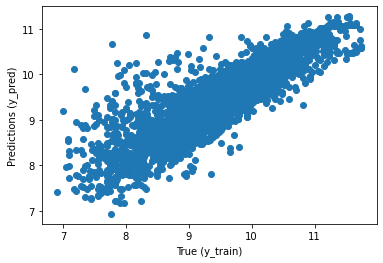

In [50]:
# now, lets visualize.
plt.scatter(y_train, y_pred)
plt.xlabel('True (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.show()
# it is almost good.

**Prediction on the test data set**

In [51]:
reg.score(x_test, y_test)
#let's find the accoracy of the test set 

0.7540211105982735

In [52]:
y_pred_test = reg.predict(x_test)
#let's predict price for test set

In [53]:
y_pred_test[:10], len(y_pred_test)
#see the first 10 predictions

(array([10.71062763,  9.73260028, 11.25457294,  7.15634447,  9.83025653,
         8.50408466,  9.17205341,  9.03924091, 10.76922138,  8.06845384]),
 790)

In [54]:
# because we used the price log, we need to take exp to find the actual price and the same for true labels.
compare_df = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
compare_df
# we made a dataframe to compare the targets with the predicted prices.

,Prediction
0,44829.766361
1,16858.331788
2,77232.291944
3,1282.215176
4,18587.721954
...,...
785,6324.153886
786,11631.899174
787,54739.161069
788,12166.340067


In [55]:
compare_df['Target'] = np.exp(y_test)
compare_df
# the NaN problem is related to the old indexing for shuffling. 
# to solve the problem, we need to dro the index. 

,Prediction,Target
0,44829.766361,NaN
1,16858.331788,NaN
2,77232.291944,NaN
3,1282.215176,NaN
4,18587.721954,NaN
...,...,...
785,6324.153886,NaN
786,11631.899174,NaN
787,54739.161069,NaN
788,12166.340067,20859.15


In [56]:
y_test = y_test.reset_index(drop=True)

y_test.head()
#beautiful, the problem solved

0    10.325482
1     9.928180
2    11.385092
3     8.216088
4     9.878170
Name: Price_log, dtype: float64

In [57]:
compare_df['Target'] = np.exp(y_test)
compare_df
# now it is easily possible to compare the results.

,Prediction,Target
0,44829.766361,30500.0
1,16858.331788,20500.0
2,77232.291944,88000.0
3,1282.215176,3700.0
4,18587.721954,19500.0
...,...,...
785,6324.153886,9800.0
786,11631.899174,10800.0
787,54739.161069,115555.0
788,12166.340067,9900.0


## Random Forest Regressor

In [58]:
# now we are going to fit the data to the different algorithm which is Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
#lets evaluate on the train set
regr.score(x_train,y_train)

0.9600974025658517

In [60]:
#let's evaluate on the test data set
regr.score(x_test, y_test)

0.8025721672970493

Wow! without making any changes to the data preprocessing, we could increase the model's accuracy by 5% in the test dataset and more than 20% in the training one.

Now, we are improving the experiment by tuning hyperparameters.

In [61]:
# we attempt to change the numbers of n-estimators to see different outcomes.
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    regr_1 = RandomForestRegressor(n_estimators=i).fit(x_train, y_train)
    print(f"accruacy on the test data set: {regr_1.score(x_test, y_test)}")
    print("")

Trying model with 10 estimators...
accruacy on the test data set: 0.786493659849165

Trying model with 20 estimators...
accruacy on the test data set: 0.7950502564170725

Trying model with 30 estimators...
accruacy on the test data set: 0.8039789132195958

Trying model with 40 estimators...
accruacy on the test data set: 0.8081882512012699

Trying model with 50 estimators...
accruacy on the test data set: 0.8066215682271565

Trying model with 60 estimators...
accruacy on the test data set: 0.800731361546746

Trying model with 70 estimators...
accruacy on the test data set: 0.8061475756878658

Trying model with 80 estimators...
accruacy on the test data set: 0.8058306165277084

Trying model with 90 estimators...
accruacy on the test data set: 0.804779007865382



it seems that the best model is with 40 n_estimators.

#let's add the prediction to the dataframe and compare with the linearregression model and true_y

In [62]:
y_pred_random_forest = regr.predict(x_test)

In [63]:
compare_df['Randomforest_prediction'] = np.exp(y_pred_random_forest)
compare_df
# now, we can see all results altogether.

,Prediction,Target,Randomforest_prediction
0,44829.766361,30500.0,36611.588535
1,16858.331788,20500.0,12586.966149
2,77232.291944,88000.0,61855.686608
3,1282.215176,3700.0,2537.351868
4,18587.721954,19500.0,17045.008016
...,...,...,...
785,6324.153886,9800.0,5656.672921
786,11631.899174,10800.0,8339.074549
787,54739.161069,115555.0,52475.212093
788,12166.340067,9900.0,9789.159378


In [64]:
# let's import tenorflow
import tensorflow as tf

2022-10-25 12:24:34.116123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 12:24:34.116143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
